The idea of this task comes from the melody discrimination task that is used in the following paper:

https://www.sciencedirect.com/science/article/pii/S105381191300178X?via%3Dihub

Briefly, there are two signal classes:
1. The signal, here comprises of N sinosoidals of different frequencies.
2. The cue, a step function to specify when the network should produce the response.

After presenting the stimulus (first combination of signals) there will be a silence period in which the network should keep track of the signal (recall condition) or perform a transformation (working memory). After the pause a second signal will be presented and the network should decide if it is the same as the first or not (recall condition) or transformed properly (working memory). This example mirrors the second signal. There's a lot left to do!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import *


In [2]:
# all the frequencies (n_trials*n_frequencies)
frequency_matrix = np.random.randint(low=5,
                                     high=30,
                                     size=(3, 4)) 

# new frequencies to replace the target event (one frequency per trial)
modulated_frequencies = np.random.randint(low=1,
                                          high=3,
                                          size=(3, 1)) 
# placeholders
stim = []
trial = []

print(np.shape(frequency_matrix))
print(np.shape(modulated_frequencies))

(3, 4)
(3, 1)


In [3]:
for indx, frequencies in enumerate(frequency_matrix):
    
    make_one_event_off_params = {"n_events": int(len(frequencies)),
                                 "new_f": int(modulated_frequencies[indx]),
                                 "is_retrograde": True}
    
    #make the reference stimulus from each row of the frequency matrix
    stim.append(make_sin_stimulus(frequencies=frequencies,
                                  event_duration=500))
    
    #make one trial, i.e., the complete signal and the cue 
    trial.append(
        make_stimuli_trial(stimulus=np.array(stim[indx]),
                           silence_duration=1000,
                           global_noise=.0,
                           response_duration=500,
                           transformation=make_one_event_off,
                           cue_generator=make_cue_signal,
                           transformation_params=make_one_event_off_params))

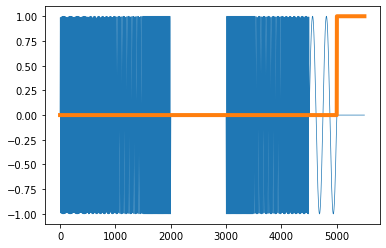

In [4]:
plt.plot(trial[0][0],linewidth=0.7);
plt.plot(trial[0][1],linewidth=4);
plt.show()
